In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel('excel tables/Scraped and Readability.xlsx')


#### Get Languages

In [ ]:
languages = set([x.strip() for xs in list(df['Sold To']) for x in xs.split(',')])
for i in languages:
    df[i] = df['Sold To'].apply(lambda x: int(any(i == lang  for lang in x.split(','))))
#book_features = df.iloc[:,25:]    

### Language Regions

In [5]:
Regions = {'North America': ['English', 'French', 'Spanish'],
           'Latin America': ['Spanish', 'Spanich', 'Spanish for  Colombia', 'Spanish for Ecuador',  
                             'Portuguese', 'Portuguese for Brazil', 'Colombia and Peru', 'Ecuador and  Peru'],
           'West Europe' : ['French for Europe','Norwegian', 'Spanish', 'Catalan', 'French', 'Dutch','Swedish',
                             'Swedish', 'Danish', 'Finnish', 'Italian', 'English', 'Galician', 'Portuguese',
                            'Valencian', 'Greek', 'German', 'French for Europe', 'Portuguese for  Europe',
                            'Portuguese for Europe', 'Maltese'], 
           'East Europe': ['Lithuanian', 'Russian','Serbian', 'Polish', 'Slovak', 'Croatian', 
                           'Bulgarian','Hungarian',  'Bulgaria', 'Estonian', 'Russian',
                           'Slovene','Romanian','Ukrainian' ],
                                                                                 
            'Middle East': ['Azerbaijani','Armenian','Georgian','Turkish','Arabic', 'Kazakh', 'Mongolian', 
                            'Uzbek', 'Hebrew', 'Arabic for Israel'],
            'East Asia' : ['Simplified Chinese','Vietnamese', 'Thai','Complex Chinese', 'English for China', 
                           'English for Hong Kong', 'Korean', 'Simplified  Chinese', 'Japanese']   }    


In [6]:
df['North America'] = df['Sold To'].apply(lambda x: int(any(lang in Regions['North America'] for lang in x.split(','))))
df['Latin America'] = df['Sold To'].apply(lambda x: int(any(lang in Regions['Latin America'] for lang in x.split(','))))
df['West Europe'] = df['Sold To'].apply(lambda x: int(any(lang in Regions['West Europe'] for lang in x.split(','))))
df['East Europe'] = df['Sold To'].apply(lambda x: int(any(lang in Regions['East Europe'] for lang in x.split(','))))
df['Middle East'] = df['Sold To'].apply(lambda x: int(any(lang in Regions['Middle East'] for lang in x.split(','))))
df['East Asia'] = df['Sold To'].apply(lambda x: int(any(lang in Regions['East Asia'] for lang in x.split(','))))


### Visualize size of Regions

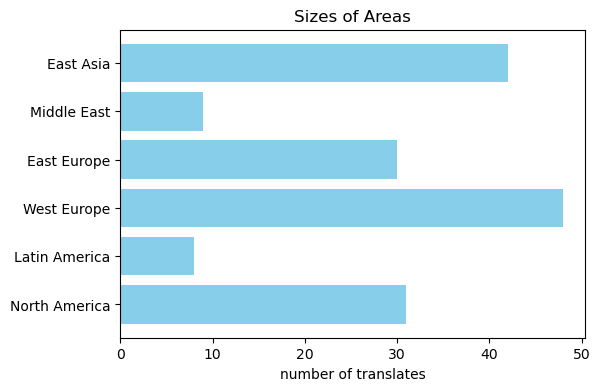

In [ ]:
sizes = {'North America': sum(df['North America']), 
         'Latin America': sum(df['Latin America']),
         'West Europe': sum(df['West Europe']),
         'East Europe': sum(df['East Europe']),
         'Middle East': sum(df['Middle East']),
         'East Asia': sum(df['East Asia'])}

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.barh(list(sizes.keys()), list(sizes.values()), color='skyblue')
plt.xlabel("number of translated books")
plt.title("Sizes of Areas")
plt.show()


### Random Forrest 

Train Error: 0.01
Test Error: 0.19


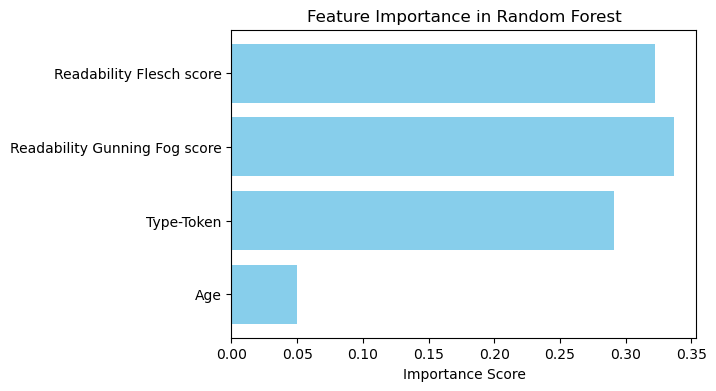

In [24]:
X = df[['Age', 'Type-Token', 'Readability Gunning Fog score', 'Readability Flesch score']]
y = df['North America']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Error metrics
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

# Plot
feature_names = X.columns

# Get feature importances
importances = rf_model.feature_importances_

print(f"Train Error: {train_error:.2f}")
print(f"Test Error: {test_error:.2f}")

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()

Index(['Norwegian', 'Danish', 'Spanich', 'Mongolian', 'Polish', 'Armenian',
       'Bulgaria', 'English for China', 'Slovene', 'Simplified  Chinese',
       'Maltese', 'English for Hong Kong', 'Portuguese for Europe',
       'Portuguese for Brazil', 'Hungarian', 'Georgian', 'Kazakh', 'Bulgarian',
       'Vietnamese', 'Slovak', 'Ecuador and  Peru', 'Dutch', 'Not found',
       'Turkish', 'Italian', 'Russian Vietnamese', 'Serbian', 'Croatian',
       'Ukrainian', 'Hebrew', 'Lithuanian', 'Japanese', 'German', 'Korean',
       'Thai', 'Catalan', 'French for Europe', 'Portuguese for  Europe',
       'Spanish for Ecuador', 'Greek', 'Arabic', 'Spanish for  Colombia',
       'Complex Chinese', 'Valencian', 'Uzbek', 'Estonian', 'Finnish',
       'Azerbaijani', 'Arabic for Israel', 'Colombia and Peru', 'French',
       'English', 'Galician', 'French for  Europe', 'Portuguese',
       'Simplified Chinese', 'Swedish', 'Spanish', 'Romanian', 'Russian'],
      dtype='object')


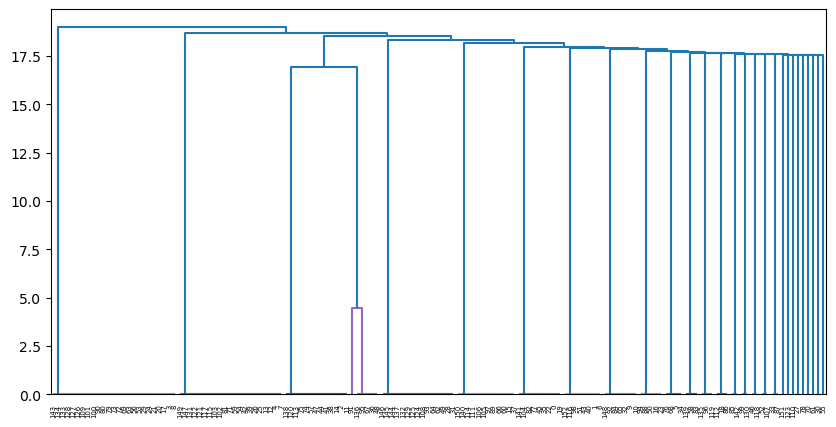

In [21]:
book_features = df[['Age', 'Type-Token', 'Readability Gunning Fog score', 'Readability Flesch score' ]]
                    #
book_features = df[['Age', 'Type-Token', 'Readability Gunning Fog score', 'Readability Flesch score', 'North America', 'Latin America', 'West Europe', 'East Europe', 'Middle East', 'East Asia']]                    
print(book_features.columns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(book_features)

Z = linkage(data_scaled, method='ward')  # Ward minimizes variance
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [55]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 4  # Change based on dendrogram
clusters = fcluster(Z, num_clusters, criterion="maxclust")
df['Hierarchical clustering'] = clusters
df[df['Hierarchical clustering'] == 1][['Book Name', 'Category', 'Age', 'Sold To', 'North America']]

,Book Name,Category,Age,Sold To,North America
2,Atlas of Extinct Animals,['Nature and Animals'],9,"English, Hungarian, Japanese, Korean, Russian ...",1
18,Beware the Doc!,['Picture Book' 'Human Body'],9,"Korean, Russian, Simplified Chinese",0
27,Hobbies and Pleasures of the Famous,['Explore The World' 'How Things Works'],12,Croatian,0
45,Unforgettable Events,['Art and Music' 'History'],9,"French, Slovene, Spanish",1
71,Outside Space and the Basics of Modern Physics,['Space'],9,"Simplified Chinese, Russian, Galician, Ukrainian",0
102,Famous Animals and Pets of the Famous,['Nature and Animals' 'Art and Music'],12,"Simplified Chinese, Vietnamese",0
110,Enjoying Film,['Picture Book' 'Art and Music' 'Explore The W...,9,Vietnamese,0
125,Atlas of Threatened Species,['Nature and Animals' 'Encyclopedias and Atlas...,9,"Bulgarian, English, German, Russian, Spanish",0
145,How the Wonders of the World Were Built,['Art and Music' 'History' 'How Things Works'],9,"Bulgarian, English, Italian, Korean, Russian, ...",0
151,City for Everyone,['Cultures' 'Picture Book' 'Art and Music' 'Ex...,12,"German, Japanese, Korean, Russian, Simplified ...",0


In [22]:
import numpy as np

pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca.fit(data_scaled)

# Get the importance of each feature
importance = np.abs(pca.components_[0])  # First principal component
feature_names = book_features.columns

# Create a DataFrame
pca_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(pca_importance_df)

                   Feature    Importance
22               Not found  6.915919e-01
51                 English  5.698201e-01
40                  Arabic  4.414960e-01
55      Simplified Chinese  4.026853e-02
17               Bulgarian  1.341564e-02
42         Complex Chinese  9.278385e-03
50                  French  6.575038e-03
57                 Spanish  5.849441e-03
21                   Dutch  5.181416e-03
7        English for China  3.962835e-03
45                Estonian  3.385148e-03
33                  Korean  2.806296e-03
24                 Italian  2.806296e-03
4                   Polish  2.806296e-03
14               Hungarian  2.197968e-03
35                 Catalan  2.197968e-03
47             Azerbaijani  2.197968e-03
59                 Russian  2.197968e-03
39                   Greek  2.197968e-03
36       French for Europe  1.493720e-03
6                 Bulgaria  1.493720e-03
48       Arabic for Israel  1.493720e-03
32                  German  1.493720e-03
27              

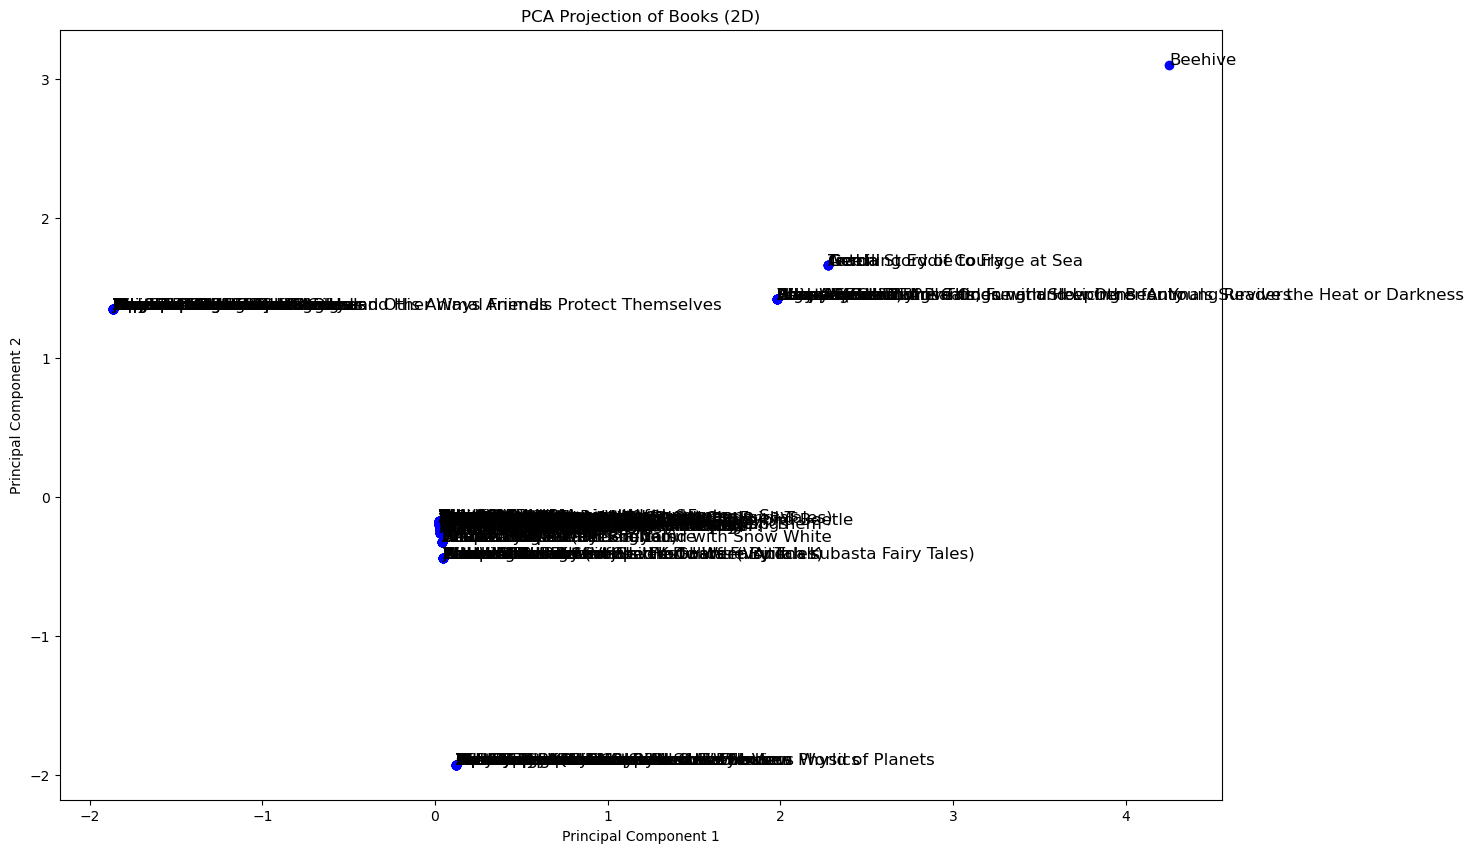

In [23]:
import matplotlib.pyplot as plt

data_pca = pca.fit_transform(data_scaled)
# Create a scatter plot of the first two principal components
plt.figure(figsize=(15, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', marker='o')

# Optionally, you can add labels to points
for i, book in enumerate(df['Book Name']):
    plt.text(data_pca[i, 0], data_pca[i, 1], f'{book}', fontsize=12)

plt.title('PCA Projection of Books (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()